<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU_20104009/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_khu%C3%B4n_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/People/

/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/People


In [5]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/People/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 140 images belonging to 3 classes.


In [6]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/People/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 43 images belonging to 3 classes.


In [7]:
train_set.class_indices

{'Tien': 0, 'Tu': 1, 'Tuoi': 2}

In [8]:
test_set.class_indices

{'Tien': 0, 'Tu': 1, 'Tuoi': 2}

In [9]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [10]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
5/5 [==============================] - 114s 24s/step - loss: 58.1656 - accuracy: 0.5000 - val_loss: 9.8711 - val_accuracy: 0.4651
Epoch 2/100
5/5 [==============================] - 18s 4s/step - loss: 2.1229 - accuracy: 0.6571 - val_loss: 0.1964 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 17s 4s/step - loss: 0.2104 - accuracy: 0.9143 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 19s 4s/step - loss: 0.1371 - accuracy: 0.9500 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 18s 3s/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 17s 3s/step - loss: 0.0308 - accuracy: 0.9929 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 18s 4s/step - loss: 0.0280 - accuracy: 0.9929 - val_loss: 6.8521e-04 - val_accuracy: 1.0000
Epoch 8/100
5/5 [===

In [11]:
model.save('face.h5')

In [12]:
model_ma = load_model('face.h5')

1/1 [==============================] - 1s 646ms/step
Tien


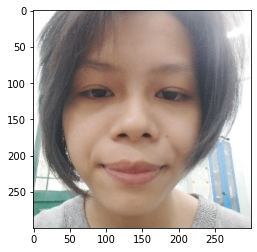

1/1 [==============================] - 0s 25ms/step
Tươi


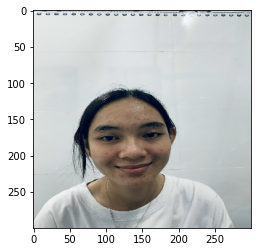

1/1 [==============================] - 0s 18ms/step
Tú


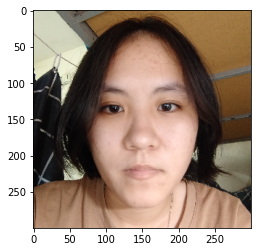

In [13]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/People/nhandang'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_ma.predict(img)
  if round(result[0][0])==1:
    prediction='Tien'
  elif round(result[0][1])==1:
    prediction = 'Tú'
  else:
    prediction = 'Tươi'
  print(prediction)
  plt.show()